In [167]:
import pymannkendall as mk
import os
import numpy as np
from netCDF4 import Dataset, num2date
import geopandas as gpd
from shapely.geometry import mapping
import xarray as xr



In [165]:

data_dir = '../../results/Modis/chla/'
varname = 'chlor_a'
shapefile_path = 'SB_Big_shapefiles/Untitled-polygon.shp'

cmin, cmax = -2, 2  # Set the min and max values for the color scale
# Initialize a dictionary to hold the data for each month.
# Assuming these are the coordinates you want to crop to

# lat_min_crop, lat_max_crop = 34.3, 35.7  # Update these values as needed
# lon_min_crop, lon_max_crop = 138.3, 140.23  # Update these values as needed

lat_min_crop, lat_max_crop = 34.5, 35.4
lon_min_crop, lon_max_crop = 138.9, 139.9

# lat_min_crop, lat_max_crop = 34.4, 35.7
# lon_min_crop, lon_max_crop = 138.35, 140.2


In [173]:

# Prepare an array to store time series data for each pixel
time_series_data = {}
time_series_data_winter = {}
time_series_data_spring = {}
time_series_data_summer = {}
time_series_data_autumn = {}

file_dates = []
count = 0
# seasonal_data = {"spring":{}, "summer":{}, "autumn":{}, "winter":{}},
  
# Loop through files and collect time series data for each pixel
for file_name in sorted(os.listdir(data_dir)):
    if file_name.endswith('.nc'):
        count = count +1
        year, month = int(file_name[1:5]), int(file_name[5:7])  # Modis
        # year, month = int(file_name[2:6]), int(file_name[6:8])   # GCOMC
        # print(year, month)
        if year < 2003 or year > 2022:
            continue
        
        # crop  the data to the region of interest with shapefile
        shapefile = gpd.read_file(shapefile_path)
        shapefile = shapefile.to_crs("EPSG:4326")
                
        ds = xr.open_dataset(file_path)
        ds = ds.rio.write_crs("epsg:4326")  # Assuming your netCDF data is in WGS 84; change this as necessary
        # Get the bounding box of the shapefile
        cropped_ds = ds.rio.clip(shapefile.geometry.apply(mapping), shapefile.crs, drop=True)

        lat = cropped_ds['lat'].values
        lon = cropped_ds['lon'].values
        sst = cropped_ds[varname].values
        # print(sst)
        sst = np.squeeze(sst)
            

        file_path = os.path.join(data_dir, file_name)
        with Dataset(file_path, 'r') as nc:
            # lat = nc['lat'][:]
            # lon = nc['lon'][:]
            # sst = np.ma.squeeze(nc[varname][:])
            
            # Find indices for cropping
            lat_inds = np.where((lat >= lat_min_crop) & (lat <= lat_max_crop))[0]
            lon_inds = np.where((lon >= lon_min_crop) & (lon <= lon_max_crop))[0]

            # Crop data
            sst_cropped = sst[lat_inds, :][:, lon_inds]
            # mask = sst_cropped.mask
            # sst_cropped = np.where(sst_cropped.mask, np.nan, sst_cropped)
            # print(sst_cropped.min(), sst_cropped.max())
            # Get time data for the file
            time = num2date(nc['time'][:], nc['time'].units)

            # Store the cropped data in the dictionary
            for i, lat_idx in enumerate(lat_inds):
                for j, lon_idx in enumerate(lon_inds):
                    if (lat_idx, lon_idx) not in time_series_data:
                        time_series_data[(lat_idx, lon_idx)] = []
                    time_series_data[(lat_idx, lon_idx)].append(sst_cropped[i, j])
                    # use conditional statement to store data in the corresponding season
                    if month in [3, 4, 5]:
                        if (lat_idx, lon_idx) not in time_series_data_spring:
                            time_series_data_spring[(lat_idx, lon_idx)] = []
                        time_series_data_spring[(lat_idx, lon_idx)].append(sst_cropped[i, j])
                    elif month in [6, 7, 8]:
                        if (lat_idx, lon_idx) not in time_series_data_summer:
                            time_series_data_summer[(lat_idx, lon_idx)] = []
                        time_series_data_summer[(lat_idx, lon_idx)].append(sst_cropped[i, j])
                    elif month in [9, 10, 11]:
                        if (lat_idx, lon_idx) not in time_series_data_autumn:
                            time_series_data_autumn[(lat_idx, lon_idx)] = []
                        time_series_data_autumn[(lat_idx, lon_idx)].append(sst_cropped[i, j])
                    elif month in [12, 1, 2]:
                        if (lat_idx, lon_idx) not in time_series_data_winter:
                            time_series_data_winter[(lat_idx, lon_idx)] = []
                        time_series_data_winter[(lat_idx, lon_idx)].append(sst_cropped[i, j])
            file_dates.append(time[0])
print("finished", count)

finished 250


In [159]:
rgb_colors = ["blue","green","lightgreen", "yellow", "orange", "#FF474C", "red"]

def mask_values(data, mask_value, mask_color):
  """
  Masks values greater than a threshold with a specific color.

  Args:
      data: The data to be masked.
      mask_value: The threshold value for masking.
      mask_color: The color to use for masking.

  Returns:
      A masked data array and a colormap with the masked color added.
  """
  masked_data = np.where(data > mask_value, mask_color, data)
  cmap_list = ['gray', mask_color] + rgb_colors[1:]  # Add mask color after gray
  custom_colormap = LinearSegmentedColormap.from_list('custom', cmap_list)
  return masked_data, custom_colormap


running
finished
[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [0.11334551 0.54834294 0.11334551 ...        nan        nan        nan]
 [0.22373335 0.11334551 0.08011831 ...        nan        nan        nan]
 [0.08850728 0.1232916  0.00743615 ...        nan        nan        nan]]


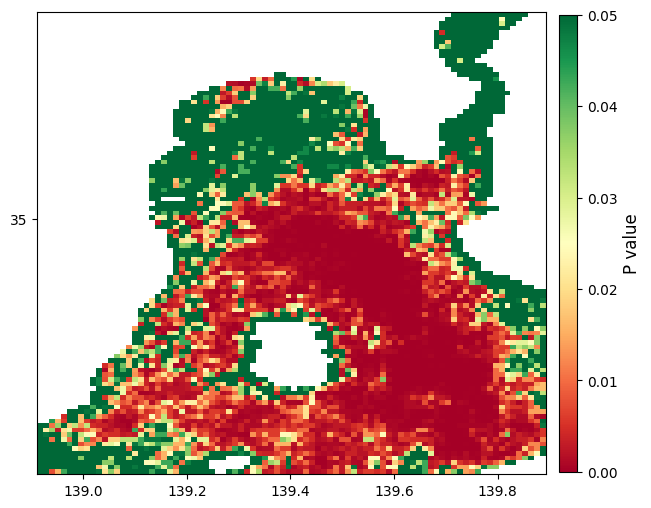

[[        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 ...
 [-0.06882223 -0.02645788 -0.02866774 ...         nan         nan
          nan]
 [-0.03783916 -0.0360447  -0.03429775 ...         nan         nan
          nan]
 [-0.04064719 -0.05123709 -0.04361853 ...         nan         nan
          nan]]


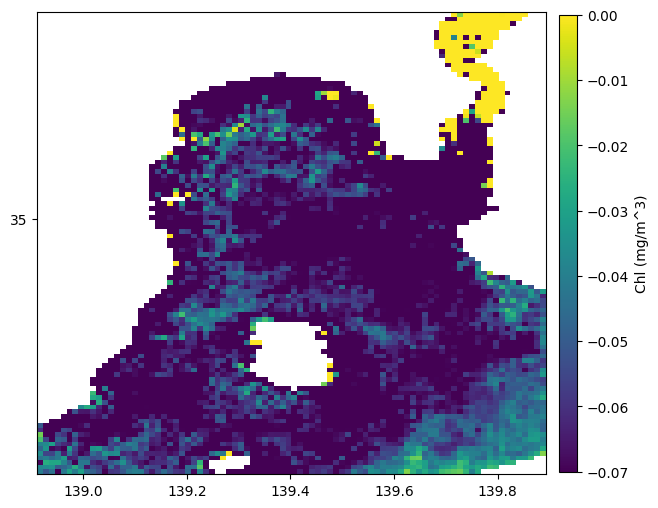

done


In [188]:
print("running")
# compute_trend(time_series_data, "all")
compute_trend(time_series_data_summer, "summer")
# compute_trend(time_series_data_autumn, "autumn")
# compute_trend(time_series_data_winter, "winter")
# compute_trend(time_series_data_spring, "spring")
print("done")

In [160]:
def compute_trend(time_series_data, season):  # Perform Mann-Kendall trend test for each pixel
    trend_results = np.full((len(lat_inds), len(lon_inds)), np.nan)
    p_values = np.full((len(lat_inds), len(lon_inds)), np.nan)
    sen_slopes = np.full((len(lat_inds), len(lon_inds)), np.nan)
    trend = np.full((len(lat_inds), len(lon_inds)), "")
    for (lat_idx, lon_idx), values in time_series_data.items():
        try:
            # Convert list of values to a numpy array
            values = np.array(values)
            valid_values = values[~np.isnan(values)]
            # print(len(valid_values), len(values))
            # Ensure that values are not all NaNs and there is a sufficient time series length
            if np.count_nonzero(~np.isnan(values)) > 1:  # More than one non-NaN value
                # Perform Mann-Kendall test
                # result = mk.original_test(values[~np.isnan(values)])  # Exclude NaNs for the test
                result = mk.seasonal_test(values[~np.isnan(values)])
                sen_slope = mk.seasonal_sens_slope(valid_values)
                # if result.p < 0.05:
                p_values[lat_idx - lat_inds[0], lon_idx - lon_inds[0]] = result.p
                trend[lat_idx - lat_inds[0], lon_idx - lon_inds[0]] = result.trend
                trend_results[lat_idx - lat_inds[0], lon_idx - lon_inds[0]] = result.slope
                sen_slopes[lat_idx - lat_inds[0], lon_idx - lon_inds[0]] = sen_slope.slope
                # else:
                #     # Not enough data to perform the test
                #     trend_results[lat_idx - lat_inds[0], lon_idx - lon_inds[0]] = -101
                #     p_values[lat_idx - lat_inds[0], lon_idx - lon_inds[0]] = -101
                #     sen_slopes[lat_idx - lat_inds[0], lon_idx - lon_inds[0]] = -101
            else:
                # Not enough data to perform the test
                trend_results[lat_idx - lat_inds[0], lon_idx - lon_inds[0]] = np.nan
                p_values[lat_idx - lat_inds[0], lon_idx - lon_inds[0]] = np.nan
                sen_slopes[lat_idx - lat_inds[0], lon_idx - lon_inds[0]] = np.nan
        except Exception as e:
            continue
    print("finished")
    plot_pvalue(p_values, season)
    # plot_pvalue_significant(p_values, season)
    plot_slope(sen_slopes,season)

In [187]:
def plot_pvalue(p_values, season="all"):
    # Plot the results
    import matplotlib.pyplot as plt
    from mpl_toolkits.basemap import Basemap
    from matplotlib import pyplot as plot, colors
    from matplotlib.colors import LinearSegmentedColormap
    
    print(p_values)
    # Create a Basemap instance
    # m = Basemap(projection='cyl', resolution='l',
    #             llcrnrlat=lat[lat_inds[0]], urcrnrlat=lat[lat_inds[-1]],
    #             llcrnrlon=lon[lon_inds[0]], urcrnrlon=lon[lon_inds[-1]])

    
    # Create a grid of coordinates
    lon_grid, lat_grid = np.meshgrid(lon[lon_inds], lat[lat_inds])
    rgb_colors = ["blue","green","lightgreen", "yellow", "orange", "#FF474C", "red"]
    
    fig, ax = plot.subplots(figsize=(7, 6))  # Adjust the width and height to better suit your data aspect ratio
    extent = [lon_grid.min(), lon_grid.max(), lat_grid.min(), lat_grid.max()]
    ax.imshow(p_values, cmap='gray',  extent=extent)
    
    # Create a colormap object
    custom_colormap = LinearSegmentedColormap.from_list('custom', rgb_colors)
    
    # mark light blue for values greater than 0.05
    
    # Create a grid of coordinates
    lon_grid, lat_grid = np.meshgrid(lon[lon_inds], lat[lat_inds])
    # rgb_colors = ["red","blue","green","lightgreen", "yellow", "orange"]
    # custom_colormap = LinearSegmentedColormap.from_list('custom', rgb_colors)
    # masked_p_values, custom_colormap = mask_values(p_values, 0.06, "red")
    
    # ims = ax.imshow(masked_p_values, vmin=0, vmax=0.05, cmap=custom_colormap, extent=extent)
    # ims = ax.imshow(trend_results,vmin=cmin, vmax=cmax,  extent=extent)
    ims = ax.imshow(p_values,  vmin=0, vmax=0.05,cmap="RdYlGn",  extent=extent)

    # plt plot countours from shapefile
    shapefile = gpd.read_file("","")
    shapefile = shapefile.to_crs("EPSG:4326")
    shapefile.plot(ax=ax, facecolor="none", edgecolor="black")
    
    


    # # Figure labels
    # ax.set_xlabel('Longitude [$^\mathregular{o}$E]', fontsize="12")
    # ax.set_ylabel('Latitude [$^\mathregular{o}$N]', fontsize="12")
    ax.set_yticks(range(int(np.ceil(lat_grid.min())), int(np.ceil(lat_grid.max())), 1))
    # ax.set_title(time[0].strftime('%b %Y'))
    
    # # Colourbar
    cbar = fig.colorbar(ims, ax=ax, orientation='vertical', fraction=0.0324, pad=0.025,  aspect=26)
    # cbar.set_label('log10(Chl-a) Conc. mg/m^3', fontsize="12")
    cbar.set_label('P value', fontsize="12")
    
    # ticks = [ims.get_clim()[0],0, ims.get_clim()[1]] # This gets the color limit range
    # cbar.set_ticks(ticks)
    # cbar.set_ticklabels([f'{ticks[0]:.2f}', f'{ticks[1]:.2f}', f'{ticks[2]:.2f}']) # Format as desired
    # plt.savefig(f'results/modis_chla_pvalues2_modified_{season}.png', dpi=300, bbox_inches='tight')
    
    

    # contour
    # m.contourf(lon_grid, lat_grid, p_values, cp=custom_colormap, latlon=True)
    # m.drawcoastlines()
    # m.drawcountries()
    # m.drawstates()
    # m.drawparallels(np.arange(lat_grid.min(), lat_grid.max(), 0.5), labels=[1, 0, 0, 0])
    # m.drawmeridians(np.arange(lon_grid.min(), lon_grid.max(), 0.5), labels=[0, 0, 0, 1])
    
    plt.show()


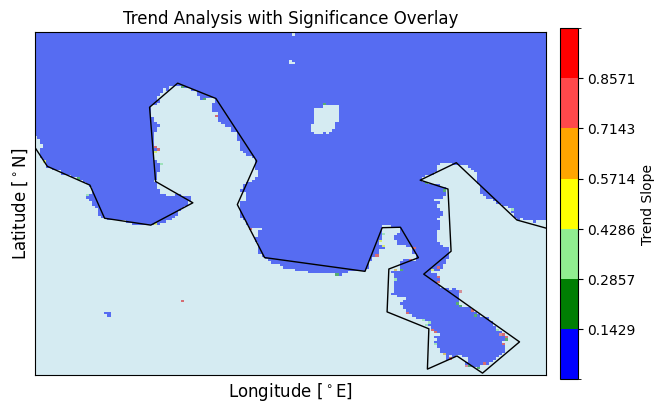

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, BoundaryNorm

# Assuming p_values is your array of p-values
# Assuming trend_results is your array of trend values (e.g., Sen's slope)

# Create a Basemap instance
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=lat[lat_inds[0]], urcrnrlat=lat[lat_inds[-1]],
            llcrnrlon=lon[lon_inds[0]], urcrnrlon=lon[lon_inds[-1]])

# Create a grid of coordinates
lon_grid, lat_grid = np.meshgrid(lon[lon_inds], lat[lat_inds])

# Define your colormap for significant trends
rgb_colors = ["blue", "green", "lightgreen", "yellow", "orange", "#FF474C", "red"]
custom_colormap = LinearSegmentedColormap.from_list('custom', rgb_colors)

# Set the bounds for the colormap
bounds = np.linspace(0, 1, len(rgb_colors) + 1)
norm = BoundaryNorm(bounds, custom_colormap.N)

# Plot the trend results with the custom colormap
fig, ax = plt.subplots(figsize=(7, 6))
m.drawcoastlines()
trend_im = m.pcolormesh(lon_grid, lat_grid, trend_results, cmap=custom_colormap, norm=norm, latlon=True)

# Overlay non-significant trends in light blue
# Mask significant trends (p < 0.05), so non-significant trends are shown
non_sig_mask = np.ma.masked_greater(p_values, 0.05).mask
m.pcolormesh(lon_grid, lat_grid, non_sig_mask, cmap=ListedColormap(['lightblue']), alpha=0.5, latlon=True)

# Add color bar
cbar = plt.colorbar(trend_im, ax=ax, orientation='vertical', fraction=0.0324, pad=0.025, spacing='proportional', ticks=bounds[1:-1])
cbar.set_label('Trend Slope')

ax.set_xlabel('Longitude [$^\circ$E]', fontsize="12")
ax.set_ylabel('Latitude [$^\circ$N]', fontsize="12")

plt.title('Trend Analysis with Significance Overlay')
plt.show()


In [162]:
# Plot the results
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot as plot, colors
from matplotlib.colors import LinearSegmentedColormap


In [184]:
def plot_slope(sen_slopes,season="all"):
    print(sen_slopes)
    # sen_slopes = trend_results
    # sen_slopes = sen_slopes * 12*10
    
    fig, ax = plot.subplots(figsize=(7, 6))  # Adjust the width and height to better suit your data aspect ratio
    lon_grid, lat_grid = np.meshgrid(lon[lon_inds], lat[lat_inds])
    extent = [lon_grid.min(), lon_grid.max(), lat_grid.min(), lat_grid.max()]
    # ax.imshow(sen_slopes, cmap='gray', vmin=0, vmax=1, extent=extent)
    
    ims = ax.imshow(sen_slopes , vmin=-0.07, vmax=0, extent=extent)
    
    # # Figure labels
    # ax.set_xlabel('Longitude [$^\mathregular{o}$E]', fontsize="12")
    # ax.set_ylabel('Latitude [$^\mathregular{o}$N]', fontsize="12")
    ax.set_yticks(range(int(np.ceil(lat_grid.min())), int(np.ceil(lat_grid.max())), 1))
    # ax.set_title(time[0].strftime('%b %Y'))
    
    # # Colourbar
    cbar = fig.colorbar(ims, ax=ax, orientation='vertical', fraction=0.0324, pad=0.025,  aspect=26)
    # cbar.set_label('SST (℃/decade)')
    cbar.set_label('Chl (mg/m^3)')
    
    # Small Sagami Bay
    lat_min, lat_max = 35.124, 35.34
    lon_min, lon_max = 139.115, 139.68
    # plt.savefig(f'results/seasonal_slope_sst_modis{season}.png', dpi=300, bbox_inches='tight')
    plt.show()


In [ ]:
# def plot_slope(sen_slopes, p_values, season="all"):
#     import numpy as np
#     import matplotlib.pyplot as plt
#     from mpl_toolkits.basemap import Basemap
   
#    # mask p_values of nan to 10
#    #  p_values = np.where(np.isnan(p_values), 10, p_values)
#     # Check if p_values is a numpy array with numeric type, if not, try to convert it
#     if not isinstance(p_values, np.ndarray) or p_values.dtype.type is np.str_:
#         try:
#             p_values = np.array(p_values, dtype=float)
#         except ValueError as e:
#             raise ValueError("p_values must be a numeric array") from e

#     # Mask slopes where p-values are greater than or equal to 0.05
#     masked_sen_slopes = np.ma.masked_where(p_values >= 0.05, sen_slopes*12*10)  # Adjust slope units if necessary

#     # Plotting code (make sure to use masked_sen_slopes instead of sen_slopes directly)
#     fig, ax = plt.subplots(figsize=(7, 6))
#     lon_grid, lat_grid = np.meshgrid(lon[lon_inds], lat[lat_inds])
#     extent = [lon_grid.min(), lon_grid.max(), lat_grid.min(), lat_grid.max()]

#     ims = ax.imshow(masked_sen_slopes, vmin=-2, vmax=0, extent=extent)

#     ax.set_yticks(range(int(np.ceil(lat_grid.min())), int(np.ceil(lat_grid.max())), 1))

#     cbar = fig.colorbar(ims, ax=ax, orientation='vertical', fraction=0.0324, pad=0.025, aspect=26)
#     cbar.set_label('Chl (mg/m^3)/decade')

#     plt.show()


14.293403


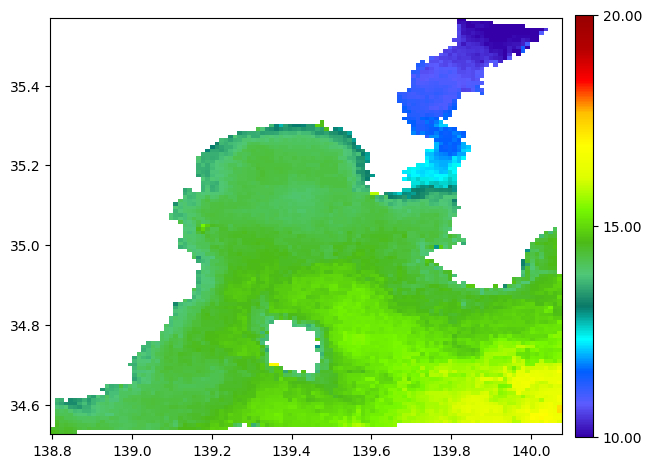

In [11]:
import geopandas as gpd
import xarray as xr
import rioxarray
from shapely.geometry import mapping
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot as plot, colors
from mpl_toolkits import basemap
import numpy as np
from netCDF4 import Dataset, num2date
from matplotlib.colors import LinearSegmentedColormap
from geopandas import GeoSeries

# Small Sagami Bay
lat_min_crop, lat_max_crop = 34.5, 35.4
lon_min_crop, lon_max_crop = 138.8, 139.9
cmin, cmax = 10, 20 
vmin, vmax = 10, 20  
varname="sst"

# norm = colors.LogNorm(cmin, cmax)

# Path to your shapefile and netCDF file
# shapefile_path = 'SB_Big_shapefiles/Untitled-polygon.shp'
shapefile_path = 'GEE_Exports_new3/Water_Bodies_2018222.shp'

netcdf_file_path = '../../results/Modis/sst/A200402_SST_NW_month.nc'
# Load the shapefile
shapefile = gpd.read_file(shapefile_path)

# Open the netCDF file using xarray and convert it to a raster using rioxarray
ds = xr.open_dataset(netcdf_file_path)
ds = ds.rio.write_crs("epsg:4326")  # Assuming your netCDF data is in WGS 84; change this as necessary

# print( shapefile.crs)
# Crop the dataset based on the shapefile
# Note: You might need to ensure that the CRS of the shapefile and the dataset match or reproject one to match the other
cropped_ds = ds.rio.clip(shapefile.geometry.apply(mapping), shapefile.crs, drop=True)
# cropped_ds = ds.rio.clip(shapefile.geometry.buffer(-0.5).apply(mapping), shapefile.crs, drop=True)

lat = cropped_ds['lat'].values
lon = cropped_ds['lon'].values
sst = cropped_ds[varname].values

# Define your color list in hex
# hex_colors = [
#     '#3500a8', '#0800ba', '#003fd6',
#     '#00aca9', '#77f800', '#ff8800',
#     '#b30000', '#920000', '#880000'
# ]
hex_colors = [
    '#3500a8',  '#5C5CFF','#005EFF','#00FFFF',
     '#097969','#50C878',"#4CBB17",'#77f800','#DFFF00','yellow', "#FFBF00", "red",
    '#b30000', '#990000'
]

rgb_colors = [colors.hex2color(color) for color in hex_colors]
mean = np.nanmean(sst)

print(mean)
sst = np.squeeze(sst)
if len(lon.shape) == 1:
   lon_cropped, lat_cropped = np.meshgrid(lon, lat)
lon_0, lat_0 = (lon_cropped.min() + lon_cropped.max()), (lat_cropped.min() + lat_cropped.max()) / 2

# sds_cropped_log = np.ma.masked_less_equal(sst, 0)  # Mask non-positive values
# sds_cropped_log = np.ma.log10(sds_cropped_log)  # Apply log10 to the data
sds_cropped_log = sst

fig, ax = plot.subplots(figsize=(7, 6))  # Adjust the width and height to better suit your data aspect ratio

extent = [lon_cropped.min(), lon_cropped.max(), lat_cropped.min(), lat_cropped.max()]

custom_colormap = LinearSegmentedColormap.from_list('custom', rgb_colors)

# ims = ax.imshow(sds_cropped_log, cmap='jet', extent=extent)
ims = ax.imshow(sds_cropped_log,vmin=cmin, vmax=cmax,  cmap=custom_colormap, extent=extent)
cbar = fig.colorbar(ims, ax=ax, orientation='vertical', fraction=0.0324, pad=0.025,  aspect=24)
ticks = [ims.get_clim()[0],(ims.get_clim()[0] + ims.get_clim()[1])/2, ims.get_clim()[1]] # This gets the color limit range
cbar.set_ticks(ticks)
cbar.set_ticklabels([f'{ticks[0]:.2f}', f'{ticks[1]:.2f}', f'{ticks[2]:.2f}']) # Format as desired
plot.show()

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



14.358053


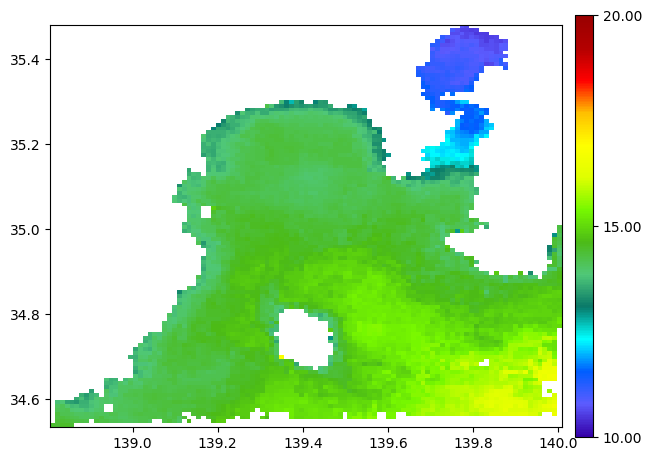

In [33]:
import geopandas as gpd
import xarray as xr
import rioxarray
from shapely.geometry import mapping
import geopandas as gpd
import xarray as xr
import rioxarray
from shapely.geometry import mapping
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot as plot, colors
from mpl_toolkits import basemap
import numpy as np
from netCDF4 import Dataset, num2date
from matplotlib.colors import LinearSegmentedColormap
from geopandas import GeoSeries



# Small Sagami Bay
lat_min_crop, lat_max_crop = 34.5, 35.4
lon_min_crop, lon_max_crop = 138.8, 139.9
cmin, cmax = 10, 20 
vmin, vmax = 10, 20  
varname="sst"
netcdf_file_path = '../../results/Modis/sst/A200402_SST_NW_month.nc'

# Load the shapefile
shapefile_path = 'GEE_Exports_new4/Water_Bodies_2018222.shp'
shapefile = gpd.read_file(shapefile_path)

# Step 1: Project the shapefile to a suitable projected CRS for your area
# For Sagami Bay, Japan, you might use a UTM zone like EPSG:3099. Adjust as necessary.
shapefile_proj = shapefile.to_crs(epsg=3099)  # Change to the appropriate EPSG code for your area

# Step 2: Buffer the geometries in the projected CRS (500 meters)
buffered_shapefile_proj = shapefile_proj.buffer(-2000)

# Optional: Project back to the original CRS if needed
buffered_shapefile = buffered_shapefile_proj.to_crs(epsg=4326)

# Continue with your existing code for clipping...
# Open the netCDF file using xarray and convert it to a raster using rioxarray
ds = xr.open_dataset(netcdf_file_path)
ds = ds.rio.write_crs("epsg:4326")
# Crop the dataset using the buffered geometry
cropped_ds = ds.rio.clip(buffered_shapefile.geometry.apply(mapping), crs=4326, drop=True)


lat = cropped_ds['lat'].values
lon = cropped_ds['lon'].values
sst = cropped_ds[varname].values

# Define your color list in hex
# hex_colors = [
#     '#3500a8', '#0800ba', '#003fd6',
#     '#00aca9', '#77f800', '#ff8800',
#     '#b30000', '#920000', '#880000'
# ]
hex_colors = [
    '#3500a8',  '#5C5CFF','#005EFF','#00FFFF',
     '#097969','#50C878',"#4CBB17",'#77f800','#DFFF00','yellow', "#FFBF00", "red",
    '#b30000', '#990000'
]

rgb_colors = [colors.hex2color(color) for color in hex_colors]
mean = np.nanmean(sst)

print(mean)
sst = np.squeeze(sst)
      
# Visualisation with basemap
if len(lon.shape) == 1:
   lon_cropped, lat_cropped = np.meshgrid(lon, lat)
lon_0, lat_0 = (lon_cropped.min() + lon_cropped.max()), (lat_cropped.min() + lat_cropped.max()) / 2

sds_cropped_log = sst

fig, ax = plot.subplots(figsize=(7, 6))  # Adjust the width and height to better suit your data aspect ratio

extent = [lon_cropped.min(), lon_cropped.max(), lat_cropped.min(), lat_cropped.max()]

custom_colormap = LinearSegmentedColormap.from_list('custom', rgb_colors)

# ims = ax.imshow(sds_cropped_log, cmap='jet', extent=extent)
ims = ax.imshow(sds_cropped_log,vmin=cmin, vmax=cmax,  cmap=custom_colormap, extent=extent)

# # Colourbar
cbar = fig.colorbar(ims, ax=ax, orientation='vertical', fraction=0.0324, pad=0.025,  aspect=24)
ticks = [ims.get_clim()[0],(ims.get_clim()[0] + ims.get_clim()[1])/2, ims.get_clim()[1]] # This gets the color limit range
cbar.set_ticks(ticks)
cbar.set_ticklabels([f'{ticks[0]:.2f}', f'{ticks[1]:.2f}', f'{ticks[2]:.2f}']) # Format as desired
plot.show()

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



25.767565


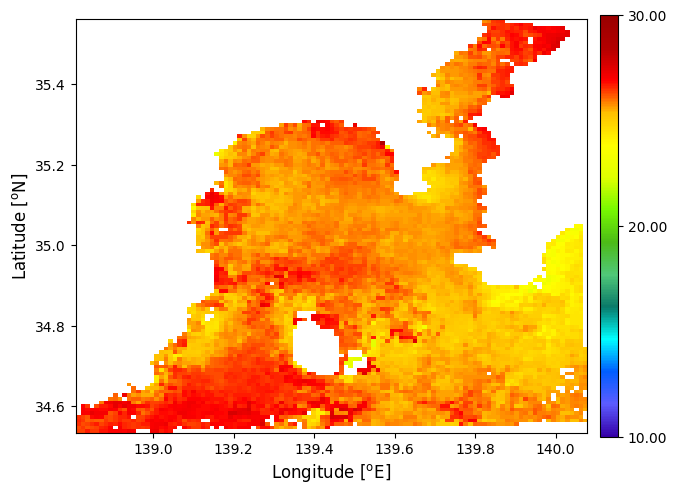

In [32]:
import geopandas as gpd
import xarray as xr
import rioxarray
from shapely.geometry import mapping
import geopandas as gpd
import xarray as xr
import rioxarray
from shapely.geometry import mapping
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot as plot, colors
from mpl_toolkits import basemap
import numpy as np
from netCDF4 import Dataset, num2date
from matplotlib.colors import LinearSegmentedColormap
from geopandas import GeoSeries

# Small Sagami Bay
lat_min_crop, lat_max_crop = 34.5, 35.4
lon_min_crop, lon_max_crop = 138.8, 139.9
cmin, cmax = 10, 30 
vmin, vmax = 10, 30  
varname="sst"
netcdf_file_path = '../../results/gcomc/sst/2018/GS201805_SST_NW_month.nc'
netcdf_file_path = '../../results/modis/sst/A200208_SST_NW_month.nc'

ds = xr.open_dataset(netcdf_file_path)
ds = ds.rio.write_crs("epsg:4326")

# Load the shapefile
shapefile_path = 'GEE_Exports_new4/Water_Bodies_2018222.shp'
shapefile = gpd.read_file(shapefile_path)

# # Step 1: Project the shapefile to a suitable projected CRS for your area
# # For Sagami Bay, Japan, you might use a UTM zone like EPSG:3099. Adjust as necessary.
# shapefile_proj = shapefile.to_crs(epsg=3099)  # Change to the appropriate EPSG code for your area
shapefile = shapefile.to_crs("EPSG:32654")  # Example UTM zone
# buffered_geometries = shapefile.geometry.buffer(0)  # Buffer in meters
# buffered_shapefile = buffered_shapefile_proj.to_crs(epsg=4326)

# cropped_ds = ds.rio.clip(buffered_geometries, drop=True)
# cropped_ds = ds.rio.clip(buffered_shapefile.geometry.apply(mapping), crs=4326, drop=True)

# Step 2: Buffer the geometries in the projected CRS (500 meters)
buffered_shapefile_proj = shapefile_proj.buffer(-500)

# Optional: Project back to the original CRS if needed
buffered_shapefile = buffered_shapefile_proj.to_crs(epsg=4326)

# Continue with your existing code for clipping...
# Open the netCDF file using xarray and convert it to a raster using rioxarray
ds = xr.open_dataset(netcdf_file_path)
ds = ds.rio.write_crs("epsg:4326")
cropped_ds = ds.rio.clip(buffered_shapefile.geometry.apply(mapping), crs=4326, drop=True)

lat = cropped_ds['lat'].values
lon = cropped_ds['lon'].values
sst = cropped_ds[varname].values

# Define your color list in hex
# hex_colors = [
#     '#3500a8', '#0800ba', '#003fd6',
#     '#00aca9', '#77f800', '#ff8800',
#     '#b30000', '#920000', '#880000'
# ]
hex_colors = [
    '#3500a8',  '#5C5CFF','#005EFF','#00FFFF',
     '#097969','#50C878',"#4CBB17",'#77f800','#DFFF00','yellow', "#FFBF00", "red",
    '#b30000', '#990000'
]

rgb_colors = [colors.hex2color(color) for color in hex_colors]
mean = np.nanmean(sst)

print(mean)
sst = np.squeeze(sst)
      
# Visualisation with basemap
if len(lon.shape) == 1:
   lon_cropped, lat_cropped = np.meshgrid(lon, lat)
lon_0, lat_0 = (lon_cropped.min() + lon_cropped.max()), (lat_cropped.min() + lat_cropped.max()) / 2


# sds_cropped_log = np.ma.masked_less_equal(sst, 0)  # Mask non-positive values
# sds_cropped_log = np.ma.log10(sds_cropped_log)  # Apply log10 to the data
sds_cropped_log = sst

fig, ax = plot.subplots(figsize=(7, 6))  # Adjust the width and height to better suit your data aspect ratio

extent = [lon_cropped.min(), lon_cropped.max(), lat_cropped.min(), lat_cropped.max()]

custom_colormap = LinearSegmentedColormap.from_list('custom', rgb_colors)

# ims = ax.imshow(sds_cropped_log, cmap='jet', extent=extent)
ims = ax.imshow(sds_cropped_log,vmin=cmin, vmax=cmax,  cmap=custom_colormap, extent=extent)

# # Figure labels
ax.set_xlabel('Longitude [$^\mathregular{o}$E]', fontsize="12")
ax.set_ylabel('Latitude [$^\mathregular{o}$N]', fontsize="12")
# ax.set_yticks(range(int(np.ceil(lat_cropped.min())), int(np.ceil(lat_cropped.max())) + 1, 1))
# ax.set_title(time[0].strftime('%b %Y'))

# # Colourbar
cbar = fig.colorbar(ims, ax=ax, orientation='vertical', fraction=0.0324, pad=0.025,  aspect=24)
ticks = [ims.get_clim()[0],(ims.get_clim()[0] + ims.get_clim()[1])/2, ims.get_clim()[1]] # This gets the color limit range
cbar.set_ticks(ticks)
cbar.set_ticklabels([f'{ticks[0]:.2f}', f'{ticks[1]:.2f}', f'{ticks[2]:.2f}']) # Format as desired
plot.show()